In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
import pandas as pd

# Załaduj dane IMDB
(train_data, test_data), info = tfds.load(
    "imdb_reviews",
    split=("train", "test"),
    as_supervised=True,
    with_info=True
)

# Przetwórz dane tekstowe na indeksy słów
BUFFER_SIZE = 10000
BATCH_SIZE = 64
MAX_TOKENS = 10000  # Maksymalna liczba słów w słowniku
MAX_SEQ_LEN = 256   # Maksymalna długość sekwencji

encoder = tf.keras.layers.TextVectorization(
    max_tokens=MAX_TOKENS, output_sequence_length=MAX_SEQ_LEN
)

# Dopasuj encoder na danych uczących
train_text = train_data.map(lambda text, label: text)
encoder.adapt(train_text)

# Funkcja do przetwarzania danych
def preprocess(text, label):
    return encoder(text), label

train_data = train_data.map(preprocess).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataMAP = test_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
# Budowa modelu
model = Sequential([
    layers.Embedding(input_dim=MAX_TOKENS, output_dim=128, mask_zero=True),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Kompilacja modelu
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Wyświetl podsumowanie modelu
model.summary()

# Trenowanie modelu
history = model.fit(
    train_data,
    validation_data=test_dataMAP,
    epochs=10
)

# Ocena modelu
results = model.evaluate(test_dataMAP)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 491ms/step - accuracy: 0.7013 - loss: 0.5275 - val_accuracy: 0.8650 - val_loss: 0.3159
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 503ms/step - accuracy: 0.9103 - loss: 0.2372 - val_accuracy: 0.8560 - val_loss: 0.3427
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 193s 487ms/step - accuracy: 0.9504 - loss: 0.1398 - val_accuracy: 0.8565 - val_loss: 0.4260
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 525ms/step - accuracy: 0.9725 - loss: 0.0829 - val_accuracy: 0.8474 - val_loss: 0.5689
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 210s 531ms/step - accuracy: 0.9766 - loss: 0.0664 - val_accuracy: 0.8355 - val_loss: 0.5774
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 216s 548ms/step - accuracy: 0.9898 - loss: 0.0326 - val_accuracy: 0.8438 - val_loss: 0.7380
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 209s 528ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.8394 - val_loss: 0.9416
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 214s 542ms/step - accuracy: 0.9893 -

In [ ]:
(train_data, test_data), info = tfds.load(
    "imdb_reviews",
    split=("train", "test"),
    as_supervised=True,
    with_info=True
)

train_df = pd.DataFrame([
    {"Review": text.numpy().decode('utf-8'), "Label": "Positive" if label.numpy() == 1 else "Negative"}
    for text, label in train_data.take(50) 
])
#train_df.style.set_properties(**{'white-space': 'pre-wrap'})

In [ ]:

## Optymalizacja 
# Dostosowanie parametrów
BUFFER_SIZE = 10000  
BATCH_SIZE = 64      
MAX_TOKENS = 10000   
MAX_SEQ_LEN = 256   


encoder = tf.keras.layers.TextVectorization(
    max_tokens=MAX_TOKENS, output_sequence_length=MAX_SEQ_LEN
)

# Dopasuj encoder na danych uczących
train_text = train_data.map(lambda text, label: text)
encoder.adapt(train_text)

# Funkcja do przetwarzania danych
def preprocess(text, label):
    return encoder(text), label

train_data = train_data.map(preprocess).shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataMAP = test_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#Budowa modelu
model = Sequential([
    layers.Embedding(input_dim=MAX_TOKENS, output_dim=128, mask_zero=True, input_length=MAX_SEQ_LEN),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)),
    layers.Bidirectional(layers.LSTM(32, dropout=0.4, recurrent_dropout=0.4)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])



# Kompilacja modelu
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Podsumowanie modelu
model.build(input_shape=(None, MAX_SEQ_LEN))
model.summary()

#Konfiguracja EarlyStopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Trenowanie modelu
history = model.fit(
    train_data,
    validation_data=test_dataMAP,
    epochs=10,
    callbacks=[early_stopping]
)

# Ocena modelu
results = model.evaluate(test_dataMAP)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")


c:\Users\Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 256, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,428,737 (5.45 MB)

 Trainable params: 1,428,609 (5.45 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 590ms/step - accuracy: 0.6091 - loss: 0.6374 - val_accuracy: 0.7956 - val_loss: 0.4857
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 250s 631ms/step - accuracy: 0.8372 - loss: 0.3756 - val_accuracy: 0.8386 - val_loss: 0.3625
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 237s 600ms/step - accuracy: 0.8842 - loss: 0.2865 - val_accuracy: 0.8342 - val_loss: 0.3827
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 236s 598ms/step - accuracy: 0.9069 - loss: 0.2395 - val_accuracy: 0.8109 - val_loss: 0.4229
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 242s 614ms/step - accuracy: 0.9239 - loss: 0.2026 - val_accuracy: 0.7978 - val_loss: 0.4500
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.8424 - loss: 0.3614
Test Loss: 0.3625, Test Accuracy: 0.8386


In [2]:
import pandas as pd

# Rozpakowanie oryginalnych danych testowych
original_texts = []
true_labels = []
for text, label in test_data:  
    original_texts.append(text.numpy().decode('utf-8')) 
    true_labels.append(label.numpy())  

processed_texts = []
processed_labels = []
for text_vector, label in test_dataMAP.unbatch():
    processed_texts.append(text_vector.numpy()) 
    processed_labels.append(label.numpy())  

predicted_probs = model.predict(test_dataMAP)
predicted_labels = (predicted_probs > 0.5).astype("int32").flatten() 

df = pd.DataFrame({
    'Original Text': original_texts,
    'Processed Text': processed_texts,
    'True Label': true_labels,
    'Predicted Label': predicted_labels
})

print(df.head())
df.to_csv("plik.csv", index=False)  

391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 91ms/step
                                       Original Text  \
0  There are films that make careers. For George ...   
1  A blackly comic tale of a down-trodden priest,...   
2  Scary Movie 1-4, Epic Movie, Date Movie, Meet ...   
3  Poor Shirley MacLaine tries hard to lend some ...   
4  As a former Erasmus student I enjoyed this fil...   

                                      Processed Text  True Label  \
0  [48, 24, 95, 12, 94, 4155, 16, 726, 5044, 9, 1...           1   
1  [4, 1, 723, 784, 5, 4, 1, 2291, 1, 8569, 2, 84...           1   
2  [633, 18, 2606, 1684, 18, 1321, 18, 880, 2, 1,...           0   
3  [330, 4328, 1, 481, 264, 6, 6300, 47, 1, 6, 11...           0   
4  [15, 4, 1106, 1, 1474, 10, 492, 11, 20, 53, 73...           1   

   Predicted Label  
0                0  
1                1  
2                0  
3                0  
4                1  


In [12]:

pd.set_option('display.max_colwidth', 300)
row_as_table = df.loc[[15339], ['Original Text', 'True Label', 'Predicted Label']]
row_as_table
row_as_table.style.set_properties(**{'white-space': 'pre-wrap'})

,Original Text,True Label,Predicted Label
15339,"This film is about a teen who is struggling with his social status in school. He is a ""Good Christian"" and feels that he is missing out on all the fun in high school. So he wishes he had never become one. After getting his wish and trying a worldly lifestyle he realizes that his quality of life has been dramatically diminished and wants to go back to being the person that he was. Good family-oriented film with a positive message of being proud of who you are even if you're not the most popular.",1,0


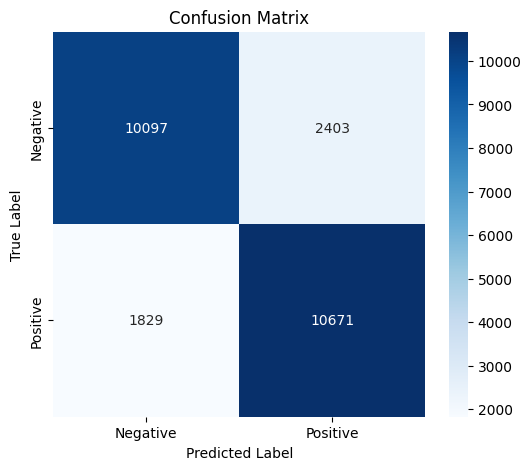

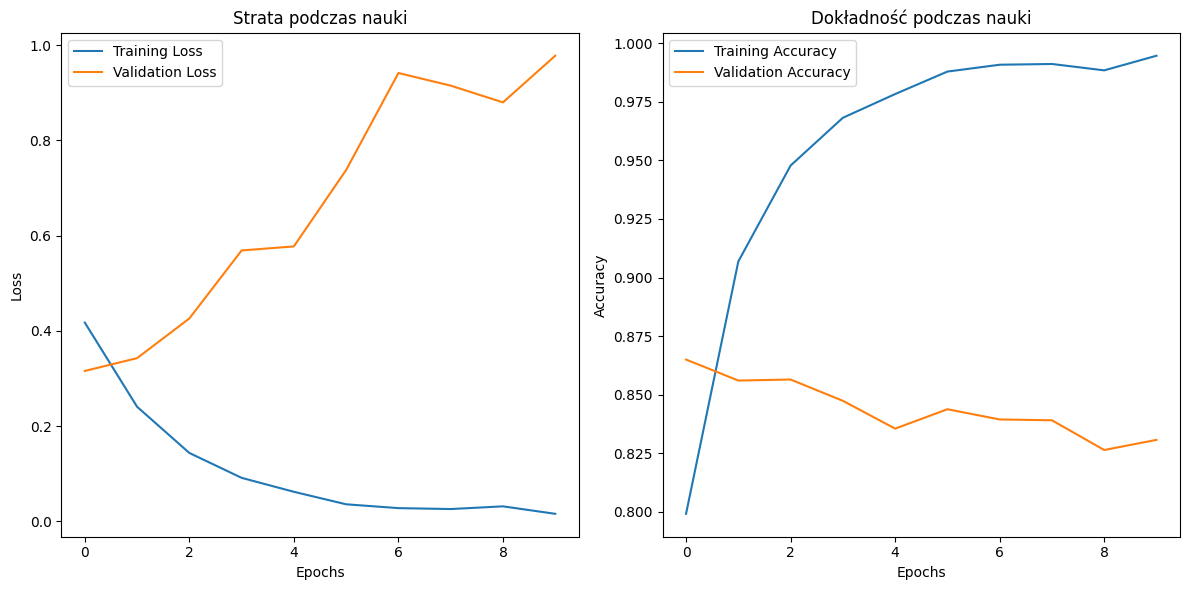

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(true_labels, predicted_labels)

# Wykres macierzy 
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(cm)

# Wykresy strat i dokładności
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Strata podczas nauki')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Dokładność podczas nauki')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)